In [2]:
import os
import subprocess
import numpy as np
import pandas as pd
from tqdm import tqdm

In [24]:
folder_path = "gen_dataset_new/old_constr_unsup"
dirs = [os.path.join(folder_path,d) for d in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, d))]

In [25]:
dirs

['gen_dataset_new/old_constr_unsup/1_2.0_1_0.1_1',
 'gen_dataset_new/old_constr_unsup/1_6.0_1_0.1_3',
 'gen_dataset_new/old_constr_unsup/1_4.0_1_0.1_1',
 'gen_dataset_new/old_constr_unsup/1_6.0_1_0.1_2',
 'gen_dataset_new/old_constr_unsup/1_1.0_1_0.1_3',
 'gen_dataset_new/old_constr_unsup/1_1.0_1_0.1_2',
 'gen_dataset_new/old_constr_unsup/1_3.0_1_0.1_1',
 'gen_dataset_new/old_constr_unsup/1_5.0_1_0.1_1',
 'gen_dataset_new/old_constr_unsup/1_2.0_1_0.1_3',
 'gen_dataset_new/old_constr_unsup/1_2.0_1_0.1_2',
 'gen_dataset_new/old_constr_unsup/1_4.0_1_0.1_3',
 'gen_dataset_new/old_constr_unsup/1_6.0_1_0.1_1',
 'gen_dataset_new/old_constr_unsup/1_4.0_1_0.1_2',
 'gen_dataset_new/old_constr_unsup/1_3.0_1_0.1_3',
 'gen_dataset_new/old_constr_unsup/1_3.0_1_0.1_2',
 'gen_dataset_new/old_constr_unsup/1_1.0_1_0.1_1',
 'gen_dataset_new/old_constr_unsup/1_5.0_1_0.1_3',
 'gen_dataset_new/old_constr_unsup/1_5.0_1_0.1_2']

In [26]:
commands = []
python_script = "/Users/mihajlobulesnij/Documents/system/RAI/project/DRL_DGM/main.py"
result_file = "model_results_new/old_constrs_unsup.csv"
for dir in dirs:
    for seed in [1]:
        cmd = f'/opt/homebrew/Caskroom/miniconda/base/envs/drl_env/bin/python {python_script} --seed {seed} --constraints_weight {0} --experiment_path {dir}  --is_real --results_file {result_file}'
        commands.append(cmd)


In [27]:
commands

['/opt/homebrew/Caskroom/miniconda/base/envs/drl_env/bin/python /Users/mihajlobulesnij/Documents/system/RAI/project/DRL_DGM/main.py --seed 1 --constraints_weight 0 --experiment_path gen_dataset_new/old_constr_unsup/1_2.0_1_0.1_1  --is_real --results_file model_results_new/old_constrs_unsup.csv',
 '/opt/homebrew/Caskroom/miniconda/base/envs/drl_env/bin/python /Users/mihajlobulesnij/Documents/system/RAI/project/DRL_DGM/main.py --seed 1 --constraints_weight 0 --experiment_path gen_dataset_new/old_constr_unsup/1_6.0_1_0.1_3  --is_real --results_file model_results_new/old_constrs_unsup.csv',
 '/opt/homebrew/Caskroom/miniconda/base/envs/drl_env/bin/python /Users/mihajlobulesnij/Documents/system/RAI/project/DRL_DGM/main.py --seed 1 --constraints_weight 0 --experiment_path gen_dataset_new/old_constr_unsup/1_4.0_1_0.1_1  --is_real --results_file model_results_new/old_constrs_unsup.csv',
 '/opt/homebrew/Caskroom/miniconda/base/envs/drl_env/bin/python /Users/mihajlobulesnij/Documents/system/RAI/p

In [ ]:
for i, cmd in tqdm(enumerate(commands, 1)):
    print(f"\n▶️ Running command {i}/{len(commands)}:\n{cmd}\n")
    
    result = subprocess.run(cmd, shell=True)

    if result.returncode != 0:
        print(f"❌ Command failed with exit code {result.returncode}:")
        print(cmd)
        break
    else:
        print(f"✅ Completed {i}/{len(commands)}\n")

In [ ]:
for i, cmd in tqdm(enumerate(commands, 1)):
    print(f"\n▶️ Running command {i}/{len(commands)}:\n{cmd}\n")
    
    result = subprocess.run(cmd, shell=True)

    if result.returncode != 0:
        print(f"❌ Command failed with exit code {result.returncode}:")
        print(cmd)
        break
    else:
        print(f"✅ Completed {i}/{len(commands)}\n")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("dataset_input_constr/resuls_inp.csv")
df[["c", "r", "b", "m", "data_seed"]] = df["experiment_path"].str.split("_", expand=True)
df["r"] = df["r"].astype(float).round(2)

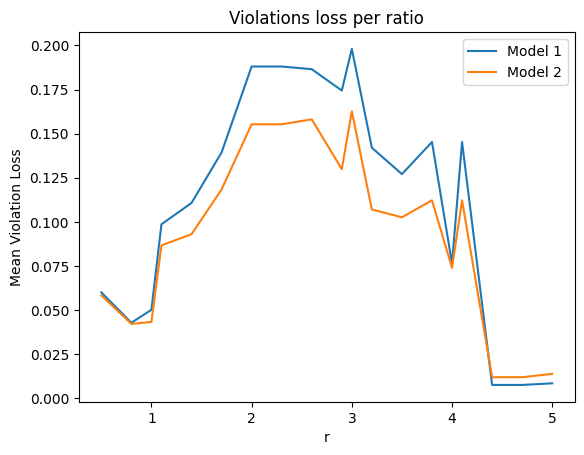

In [131]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("dataset_input_constr/resuls_inp.csv")
df[["c", "r", "b", "m", "data_seed"]] = df["experiment_path"].str.split("_", expand=True)
df["r"] = df["r"].astype(float).round(2)
# Group by r and take mean
mean_df = (
    df.groupby("r")[["model_1_violation_loss", "model_2_violation_loss"]]
      .mean()
      .reset_index()
)

# Plot
plt.plot(mean_df["r"], mean_df["model_1_violation_loss"], label="Model 1")
plt.plot(mean_df["r"], mean_df["model_2_violation_loss"], label="Model 2")

plt.title("Violations loss per ratio")
plt.xlabel("r")
plt.ylabel("Mean Violation Loss")
plt.legend()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Group by r and take mean
mean_df = (
    df.groupby("r")[["model1_mae", "model2_mae"]]
      .mean()
      .reset_index()
)

# Plot
plt.plot(mean_df["r"], mean_df["model1_mae"], label="Model 1")
plt.plot(mean_df["r"], mean_df["model2_mae"], label="Model 2")

plt.xlabel("r")
plt.ylabel("Mean Violation Loss")
plt.legend()
plt.show()


In [ ]:
plt.plot(df["r"], df["model_1_violation_loss"])
plt.plot(df["r"], df["model_2_violation_loss"])


In [ ]:
plt.plot(df["r"], df["model_1_violation_loss"])
plt.plot(df["r"], df["model_2_violation_loss"])


In [ ]:
import matplotlib.pyplot as plt

# Aggregate with consistent column names
grouped = (
    df.groupby("constraints_weight")
      .agg(
          model1_mae=("model1_mae", "mean"),
          model2_mae=("model2_mae", "mean"),
          model_1_violation_0_0001=("model_1_violation_0.0001", "mean"),
          model_2_violation_0_0001=("model_2_violation_0.0001", "mean"),
          model_1_violation_loss=("model_1_violation_loss", "mean"),
          model_2_violation_loss=("model_2_violation_loss", "mean"),
      )
      .reset_index()
)

# Ensure baseline exists
if (grouped["constraints_weight"] == 0).any():
    baseline = grouped[grouped["constraints_weight"] == 0].iloc[0]
else:
    raise ValueError("No baseline found for constraints_weight = 0")

fig, axes = plt.subplots(3, 2, figsize=(15, 8), sharex=True)
axes = axes.flatten()

metrics = [
    ("model1_mae", "Model 1 MAE"),
    ("model2_mae", "Model 2 MAE"),
    ("model_1_violation_0_0001", "Model 1 Violations"),
    ("model_2_violation_0_0001", "Model 2 Violations"),
    ("model_1_violation_loss", "Model 1 Violation Loss"),
    ("model_2_violation_loss", "Model 2 Violations Loss"),
]

for ax, (metric, ylabel) in zip(axes, metrics):
    ax.plot(
        grouped["constraints_weight"],
        grouped[metric],
        marker="o",
        label=ylabel
    )
    ax.axhline(
        y=baseline[metric],
        color="red",
        linestyle="--",
        linewidth=2,
        label="Baseline (weight = 0)"
    )
    ax.set_xlabel("Constraints Weight")
    ax.set_ylabel(ylabel)
    ax.grid(True)
    ax.legend()

fig.suptitle("Model Performance vs. Constraints Weight", fontsize=14)
plt.tight_layout()
plt.show()


In [ ]:
baseline

In [ ]:
grouped

In [ ]:
grouped[grouped.c == "2"]

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Aggregate
grouped = (
    df.groupby(["constraints_weight", "c"], as_index=False)
      .agg(
          model1_mae=("model1_mae", "mean"),
          model2_mae=("model2_mae", "mean"),
          model_1_violation_0_0001=("model_1_violation_0.0001", "mean"),
          model_2_violation_0_0001=("model_2_violation_0.0001", "mean"),
          model_1_violation_loss=("model_1_violation_loss", "mean"),
          model_2_violation_loss=("model_2_violation_loss", "mean"),
      )
)

# Compute relative change vs baseline (constraints_weight = 0)
baseline = grouped[grouped["constraints_weight"] == 0].set_index("c")

metrics = [
    "model1_mae",
    "model2_mae",
    "model_1_violation_0_0001",
    "model_2_violation_0_0001",
    "model_1_violation_loss",
    "model_2_violation_loss",
]

rel = grouped.copy()
for m in metrics:
    rel[m] =  (rel["c"].map(baseline[m]) - rel[m]) / rel["c"].map(baseline[m]) 

# Plot heatmaps
titles = [
    "Model 1 MAE",
    "Model 2 MAE",
    "Model 1 Violations",
    "Model 2 Violations",
    "Model 1 Violation Loss",
    "Model 2 Violations Loss",
]

fig, axes = plt.subplots(3, 2, figsize=(15, 12))
axes = axes.flatten()

for ax, metric, title in zip(axes, metrics, titles):
    heatmap_data = rel.pivot(
        index="c",
        columns="constraints_weight",
        values=metric
    )
    
    sns.heatmap(
        heatmap_data,
        ax=ax,
        cmap="RdBu_r",
        center=0,
        annot=True,
        fmt=".2f"
    )
    
    ax.set_title(title)
    ax.set_xlabel("Constraints Weight")
    ax.set_ylabel("c")

plt.tight_layout()
plt.show()


In [ ]:
df = pd.read_csv("model_results/input_output2_constr_fuzz.csv")

In [ ]:
import matplotlib.pyplot as plt

grouped = (
    df.groupby("constraints_weight")
      .agg(
          hammingm1=("model1_hamming", "mean"),
          hammingm2=("model2_hamming", "mean"),
          accuracym1=("model1_accuracy", "mean"),
          accuracym2=("model2_accuracy", "mean"),
          violationsm1=("model_1_violation", "mean"),
          violationsm2=("model_2_violation", "mean"),
      )
      .reset_index()
)

# Ensure baseline exists
if (grouped["constraints_weight"] == 0).any():
    baseline = grouped[grouped["constraints_weight"] == 0].iloc[0]
else:
    raise ValueError("No baseline found for constraints_weight = 0")

fig, axes = plt.subplots(3, 2, figsize=(15, 10), sharex=True)

plots = [
    ("accuracym1", "Accuracy (Model 1)"),
    ("accuracym2", "Accuracy (Model 2)"),
    ("hammingm1", "Hamming Distance (Model 1)"),
    ("hammingm2", "Hamming Distance (Model 2)"),
    ("violationsm1", "Violations (Model 1)"),
    ("violationsm2", "Violations (Model 2)"),
]

for ax, (metric, ylabel) in zip(axes.flatten(), plots):
    ax.plot(
        grouped["constraints_weight"],
        grouped[metric],
        marker="o",
        label=ylabel
    )
    ax.axhline(
        y=baseline[metric],
        color="red",
        linestyle="--",
        linewidth=2,
        label="Baseline (weight = 0)"
    )
    ax.set_ylabel(ylabel)
    ax.grid(True)
    ax.legend()

# X label only on bottom row
for ax in axes[-1]:
    ax.set_xlabel("Constraints Weight")

fig.suptitle("Model Performance vs. Constraints Weight", fontsize=14)
plt.tight_layout()
plt.show()


In [ ]:
df = pd.read_csv("model_results/input_output2_real.csv")
df[["c", "r", "b", "data_seed"]] = df["experiment_path"].str.split("_", expand=True)


In [ ]:
df

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate
heatmap_data = (
    df.groupby(["c", "b"])["model2_mae"]
      .mean()
      .unstack()   # rows = c, columns = b
)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    heatmap_data,
    cmap="viridis",
    annot=True,
    fmt=".3f"
)

plt.xlabel("b")
plt.ylabel("c")
plt.title("MAE Model 1")
plt.tight_layout()
plt.show()

In [ ]:
grouped = (
    df.groupby(["r", "constraints_weight"])
      .agg(
          hamming=("model1_hamming", "mean"),
          accuracy=("model1_accuracy", "mean"),
          violations=("model_1_violation", "mean"),
      )
      .reset_index()
)


fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharex=True)

metrics = [
    ("accuracy", "Accuracy"),
    ("hamming", "Hamming Distance"),
    ("violations", "Violations"),
]

for ax, (metric, ylabel) in zip(axes, metrics):
    for r_val, g in grouped.groupby("r"):
        ax.plot(
            g["constraints_weight"],
            g[metric],
            marker="o",
            label=f"r = {r_val}"
        )

    ax.set_xlabel("Constraints Weight")
    ax.set_ylabel(ylabel)
    ax.grid(True)

axes[0].legend(title="r")
fig.suptitle("Model Performance vs. Constraints Weight Across r", fontsize=14)
plt.tight_layout()
plt.show()


In [ ]:
# Extract baselines for each r
baselines = (
    grouped[grouped["constraints_weight"] == 0]
    .set_index("c")[["accuracy", "hamming", "violations"]]
)

# Join baselines back
grouped = grouped.join(
    baselines,
    on="c",
    rsuffix="_baseline"
)

# Difference from baseline
grouped["accuracy_diff"] = grouped["accuracy"] - grouped["accuracy_baseline"]


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
heatmap_data = grouped.pivot(
    index="r",
    columns="constraints_weight",
    values="accuracy_diff"
)
plt.figure(figsize=(10, 6))

sns.heatmap(
    heatmap_data,
    cmap="coolwarm",
    center=0,
    annot=True,
    fmt=".3f",
    cbar_kws={"label": "Δ Accuracy (vs. weight = 0)"}
)

plt.xlabel("Constraints Weight")
plt.ylabel("r")
plt.title("Accuracy Change Relative to Baseline (weight = 0)")
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

grouped_c = (
    df.groupby(["c", "constraints_weight"])
      .agg(
          accuracy=("model1_accuracy", "mean"),
          hamming=("model1_hamming", "mean"),
          violations=("model_1_violation", "mean"),
      )
      .reset_index()
)


In [ ]:
# Baselines for each c
baselines_c = (
    grouped_c[grouped_c["constraints_weight"] == 0]
    .set_index("c")[["accuracy", "hamming", "violations"]]
)

# Join baselines back
grouped_c = grouped_c.join(
    baselines_c,
    on="c",
    rsuffix="_baseline"
)

# Difference from baseline (accuracy: higher is better)
grouped_c["accuracy_diff"] = (
    grouped_c["accuracy"] - grouped_c["accuracy_baseline"]
)
grouped_c["hamming_diff"] = (
    grouped_c["hamming"] - grouped_c["hamming_baseline"]
)


In [ ]:

heatmap_data_c = grouped_c.pivot(
    index="c",
    columns="constraints_weight",
    values="hamming_diff"
)

plt.figure(figsize=(10, 6))

sns.heatmap(
    heatmap_data_c,
    cmap="coolwarm",
    center=0,
    annot=True,
    fmt=".3f",
    cbar_kws={"label": "Δ Hamming (vs. weight = 0)"}
)

plt.xlabel("Constraints Weight")
plt.ylabel("c")
plt.title("Hamming Change Relative to Baseline (weight = 0)")
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


df

In [ ]:
df

In [ ]:
df = pd.read_csv("model_results/result_precise.csv")
df[["c", "r", "b", "data_seed"]] = df["experiment_path"].str.split("_", expand=True)
df["c"] = pd.to_numeric(df["c"], errors="coerce")

mean_va = (
    df.groupby(["c", "constraints_weight"])[["model1_mae", "model2_mae", "model_1_violation_loss",	"model_2_violation_loss"]]
      .mean()
      .reset_index()
      .sort_values("c")
)

In [ ]:
import matplotlib.pyplot as plt
df = pd.read_csv("model_results/results_small_data.csv")
df[["c", "r", "b", "m", "data_seed"]] = df["experiment_path"].str.split("_", expand=True)
df["c"] = pd.to_numeric(df["c"], errors="coerce")

mean_va = (
    df.groupby(["c", "constraints_weight"])[["model1_mae", "model2_mae", "model_1_violation_loss",	"model_2_violation_loss"]]
      .mean()
      .reset_index()
      .sort_values("c")
)
# Ensure correct types and ordering
mean_va["c"] = mean_va["c"].astype(int)

df0 = mean_va[mean_va["constraints_weight"] == 0.0].sort_values("c")
df02 = mean_va[mean_va["constraints_weight"] == 0.2].sort_values("c")

plt.figure(figsize=(6,4))
plt.plot(df0["c"], df0["model_2_violation_loss"], marker="o", label="weight = 0.0")
plt.plot(df02["c"], df02["model_2_violation_loss"], marker="o", label="weight = 0.2")

plt.xlabel("c")
plt.ylabel("Model 1 Constraint Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
plt.plot(mean_va.c, mean_va.model_2_violation_loss)